In [24]:
import math
import random
import numpy as np
from numba import jit, vectorize, float64
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [10]:
def make_dot(p):
    return True if random.random() > p else False;

def gen_scatter(h, w, p):
    x = [];
    y = [];
    for i in range(w):
        for j in range(h):
            if(make_dot(p)):
                x.append(i)
                y.append(j)
    return x, y

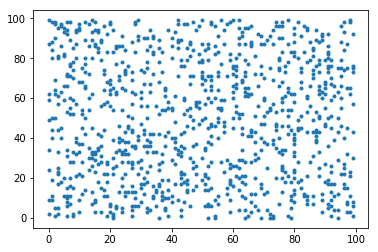

In [20]:
x, y = gen_scatter(100, 100, .9)
plt.scatter(x,y, marker=".")

In [22]:
%%timeit
gen_scatter(1000, 1000, .9)

1 loop, best of 3: 205 ms per loop


In [28]:
@jit(nopython=True)
def make_dot_numba(p):
    return True if random.random() > p else False;

@jit(nopython=True)
def gen_scatter_numba(h, w, p):
    x = [];
    y = [];
    for i in range(w):
        for j in range(h):
            if(make_dot_numba(p)):
                x.append(i)
                y.append(j)      
    return x,y

In [32]:
%%timeit
gen_scatter_numba(1000, 1000, .9)

10 loops, best of 3: 17.7 ms per loop


In [38]:
x = np.random.rand(10000000)
%timeit np.divide(x**2, x + np.arctan(x))

1 loop, best of 3: 218 ms per loop


In [39]:
@vectorize
def operation(x):
    return np.divide(x**2, x + np.arctan(x))

%timeit operation(x)

1 loop, best of 3: 138 ms per loop


In [40]:
205/17.7

11.581920903954803